In [35]:
pip install --upgrade yfinance

Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import yfinance as yf
from pandas_datareader.data import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [37]:
yf.__version__

'0.2.61'

In [38]:
apple = yf.download("AAPL", start="2024-05-25", end="2025-05-25")

[*********************100%***********************]  1 of 1 completed


In [39]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-05-28 to 2025-05-23
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   249 non-null    float64
 1   (High, AAPL)    249 non-null    float64
 2   (Low, AAPL)     249 non-null    float64
 3   (Open, AAPL)    249 non-null    float64
 4   (Volume, AAPL)  249 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [40]:
apple.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-05-28,189.105621,192.101605,188.219765,190.618535,52280100
2024-05-29,189.404221,191.355104,188.627853,188.727393,53068000
2024-05-30,190.399567,191.285423,189.742650,189.872035,49947900
2024-05-31,191.355103,191.673620,189.025999,190.548875,75158300
2024-06-03,193.126816,194.082354,191.623850,192.002071,50080500


In [41]:
# playing around to recall knowledge 

closing_prices = apple["Close"]
closing_prices.rename(columns={"AAPL":"closing"}, inplace=True)
closing_prices

C:\Users\Nazik\AppData\Local\Temp\ipykernel_20492\2507094764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices.rename(columns={"AAPL":"closing"}, inplace=True)


Ticker,closing
Date,
2024-05-28,189.105621
2024-05-29,189.404221
2024-05-30,190.399567
2024-05-31,191.355103
2024-06-03,193.126816
...,...
2025-05-19,208.779999
2025-05-20,206.860001
2025-05-21,202.089996


In [42]:
# how many days passed from the first entries date
closing_prices["Days"] = (apple.index - apple.index[0]).days
closing_prices

C:\Users\Nazik\AppData\Local\Temp\ipykernel_20492\2211896591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices["Days"] = (apple.index - apple.index[0]).days


Ticker,closing,Days
Date,,
2024-05-28,189.105621,0
2024-05-29,189.404221,1
2024-05-30,190.399567,2
2024-05-31,191.355103,3
2024-06-03,193.126816,6
...,...,...
2025-05-19,208.779999,356
2025-05-20,206.860001,357
2025-05-21,202.089996,358


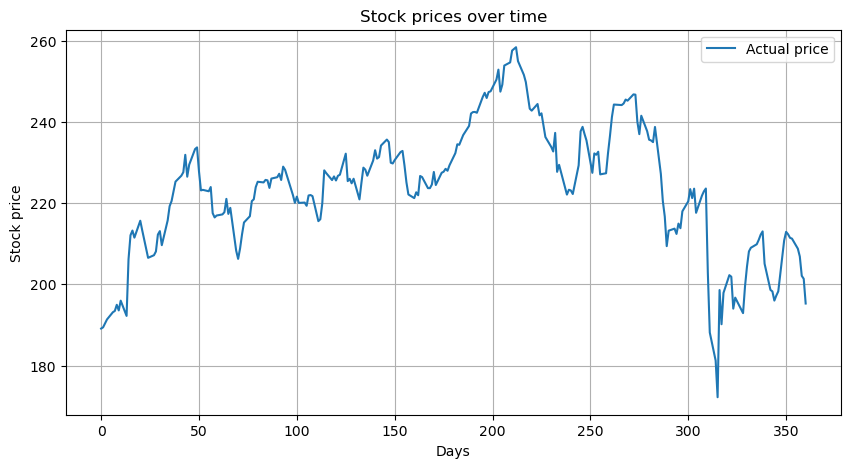

In [49]:
plt.figure(figsize=(10,5))
plt.plot(closing_prices["Days"], closing_prices["closing"], label="Actual price")
plt.xlabel("Days")
plt.ylabel("Stock price")
plt.title("Stock prices over time")
plt.legend()
plt.grid(True)
plt.show()

#### Making prediction

In [52]:
X = closing_prices[["Days"]]
Y = closing_prices["closing"]

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [54]:
future_days = pd.DataFrame({"Days":range(closing_prices["Days"].max()+1, closing_prices["Days"].max()+31)})
future_prices = model.predict(future_days)

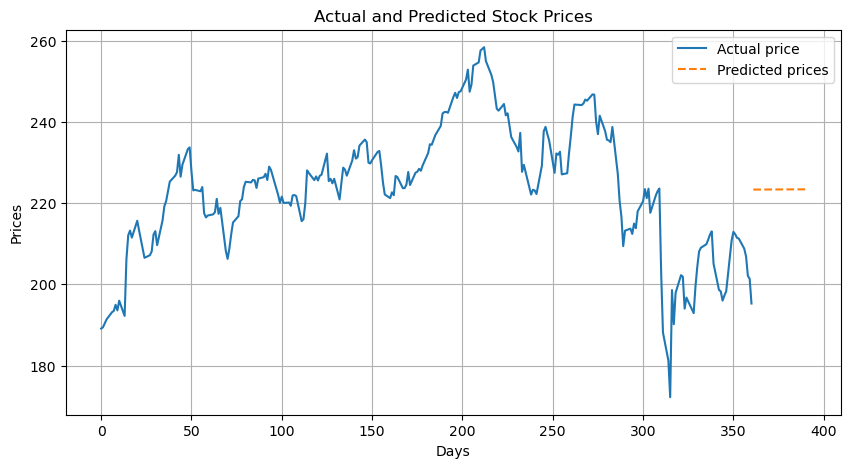

In [55]:
# let's plot the predictions
plt.figure(figsize=(10,5))
plt.plot(closing_prices['Days'], closing_prices['closing'], label = "Actual price")
plt.plot(future_days, future_prices, label = "Predicted prices", linestyle="--")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.title("Actual and Predicted Stock Prices")
plt.legend()
plt.grid(True)
plt.show()


In [56]:
yf.__version__

'0.2.61'